<a href="https://colab.research.google.com/github/IndraniMandal/New-Revisions/blob/main/Models_DT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine learning

Machine learning is a branch of artificial intelligence (AI) and computer science which focuses on the use of data and algorithms to imitate the way that humans learn, gradually improving its accuracy. 

Machine learning algorithms build a model based on sample data, known as training data, in order to make predictions or decisions without being explicitly programmed to do so Machine learning algorithms are used in a wide variety of applications, such as in medicine, email filtering, speech recognition, agriculture, and computer vision, where it is difficult or unfeasible to develop conventional algorithms to perform the needed tasks.[Wikipedia](https://en.wikipedia.org/wiki/Machine_learning)

<img src="https://drive.google.com/uc?id=1EeVd5TVEZADibVemIIQHNE66eKL-rk2B" width =500>


Photo credit 10 Companies Using Machine Learning in Cool [Ways](https://www.wordstream.com/blog/ws/2017/07/28/machine-learning-applications)

## Example of applications

<img src="https://drive.google.com/uc?id=1mGfgQcAgUL28afmFQHCg4wEFkRXHA_ym" width =500>

Photo credit: Applications of [ML](https://www.javatpoint.com/applications-of-machine-learning)



## Supervised and Unsupervised learning

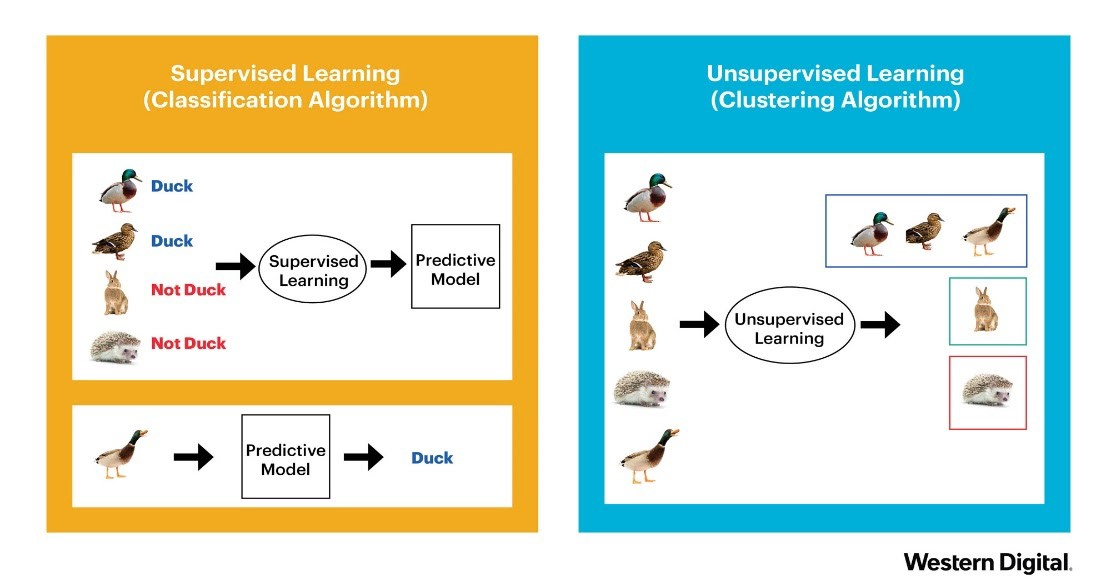

##Supervised learning
Supervised learning is a type of machine learning algorithm where the available data consists of labelled examples, where each data point contains features and an associated label. 

Example: In the above picture of supervised learning the pictures of the animals on the left come with a name tag. The name tag is called the label. The label specifies what kind of animal is in the correspoding picture. 

The goal of supervised learning algorithms is learning a function that generates labels(output) for any given features(inputs), based on example provided during training.[Wikipedia](https://en.wikipedia.org/wiki/Supervised_learning) 

Think about teaching a toddler new words. We point at pictures in a book and say out loud the name(label) of the animal. We might say "What is this? It's a duck." After a few days you take the child to a playground and the child says "Look! Ducks." The child recognizes a duck without you having to tell them this time. 

This process of showing examples and labelling the them is called supervised learning. Once the model is trained it can be used to generate labels for pictures without labels. 

## Unsupervised learning

Unsupervised learning is a type of algorithm that learns patterns from untagged data. The hope is that through mimicry, which is an important mode of learning in people, the machine is forced to build a concise representation of its world and then generate imaginative content from it.[Wikipedia](https://en.wikipedia.org/wiki/Unsupervised_learning)

## Decision Tree
Decision trees make predictions by looking at different criteria determined automatically during the training process. They are transparent model that are very easy to interpret and communicate! 

In the Decision Tree under when do we take Decision A?
We take Decision to play tennis under the following conditions: 
1. Weather(Outlook) is overcast
2. Weather(Outlook) is Sunny but the day is not Windy
3. Weather(Outlook) is Rainy but the day is not Humid

<img src="https://drive.google.com/uc?id=1PXDv3p9OiRBU5BIotrX-bp7gIsaYxodx" width =700>

[Decision Tree](https://www.saedsayad.com/decision_tree.htm) for Play Tennis dataset

###Exercise
Study the Decision Tree above.  
Do we play tennis when the weather is Sunny, temperature is not hot, the day is very hunmid and windy?

## Rules for Playing tennis
1. If the Outlook is Sunny and it's not Windy then we play tennis.
2. If the Outlook is Overcast then we play tennis.
3. If the Outlook is Rainy and the Humidity is normal we play tennis. 

## Dataset information
This is a famous dataset called Play Tennis.The data records observations over 14 days. It records the weather conditions and given those weather conditions whether they played tennis or not.

#### Attribute(column) Information:

1. Outlook
2. Temperature
3. Humidity 
4. Windy

### Look at the dataset

In [15]:
import pandas as pd # data science library
url = "https://raw.githubusercontent.com/IndraniMandal/ds-assets/main/assets/tennis.csv" # the URL
data = pd.read_csv(url) 
data # look at the data

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


## Decision tree classification using ID3 algorithm

```

1.compute the entropy for data-set
2.for every attribute/feature:
       1.calculate entropy for all categorical values
       2.take average information entropy for the current attribute
       3.calculate gain for the current attribute
3. pick the highest gain attribute.
4. Repeat until we get the tree we desired.
```



###Entropy of the dataset 

$H(S) = -p(yes) \log[2]p(yes) -p(no) \log[2]p(no)$

$p(yes) = -(9/14) \log[2]p(9/14) = 0.41$
$p(no) = -(5/14) \log[2]p(5/14) = 0.53$

$H(S) = p(yes)+p(no) =0.41+0.53 = 0.94$
      

In [30]:
data[data.play=='yes'].count()

outlook     9
temp        9
humidity    9
windy       9
play        9
dtype: int64

In [5]:
data[data.outlook == 'sunny']

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
10,sunny,mild,normal,True,yes


In [6]:
data[data.outlook == 'rainy']

,outlook,temp,humidity,windy,play
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
9,rainy,mild,normal,False,yes
13,rainy,mild,high,True,no


### Entropy $H(S,outlook)$ and Information gain for **Outlook**

In [7]:
data[data.outlook == 'overcast']

,outlook,temp,humidity,windy,play
2,overcast,hot,high,False,yes
6,overcast,cool,normal,True,yes
11,overcast,mild,high,True,yes
12,overcast,hot,normal,False,yes


$E(Outlook= overcast)= -1 \log{1}-0\log{0} = 0$

In [12]:
data[(data.outlook == 'sunny') & (data.play == 'yes')]

,outlook,temp,humidity,windy,play
8,sunny,cool,normal,False,yes
10,sunny,mild,normal,True,yes


$E(Outlook= sunny)= -\frac{2}{5} \log\frac{2}{5}- \frac{3}{5} \log\frac{3}{5} = 0.97$

In [13]:
data[(data.outlook == 'rainy') & (data.play == 'yes')]

,outlook,temp,humidity,windy,play
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
9,rainy,mild,normal,False,yes


$E(Outlook= rainy)= -\frac{3}{5} \log\frac{3}{5}- \frac{2}{5} \log\frac{2}{5} = 0.97$

###Average information gain for **Outlook**
$I(outlook) = \sum_{t = outlook values} p(t)E(t)$
$I(outlook) = \frac{5}{14} * 0.97 + \frac{4}{14}*0 + \frac{5}{14}*0.97 = 0.69$

$Gain(outlook)=E(S) -I(outlook) =0.94-0.69 =0.24$


###Pick the attribute with highest information gain as the root node
Similarity we can calculate for other attributes(Windy,Humidity and Temp).


*   $G(Outlook) = 0.94-0.69 = 0.24$
*   $G(Temperature) = 0.94-0.91 = 0.02$
*   $G(Humidity) = 0.94-0.78 = 0.15$
*   $G(Windy) = 0.94-0.89 = 0.04$



<img src="https://drive.google.com/uc?id=1YrLy3gSxaOrrKE3XT3ABQEH-SI168Bqv" width =300>


###Repeat the same process for sub-trees
* G(Temp) =0.57
* G(Humidity) = 0.97
* G(Windy) = 0.02

For those cases where the Outlook = sunny Humidity has the maximum information gain. 

<img src="https://drive.google.com/uc?id=1bKOEdZmF_agtwQYdiFtktwPtFcY_NJji" width =500>

Similarly, for those cases where the `Outlook = rainy` `Windy` has the maximum information gain with complete separation of yes and nos. Hence, `Windy` is choosen as the next node in the rain branch. 

#Models
Now, that I understand the math let's build the model. 

##Preprocessing
Non-numeric values can not be processed by a decision tree model. So we have to encode them to numeric values. 

In [16]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()

data['outlook'] = Le.fit_transform(data['outlook'])
data['temp'] = Le.fit_transform(data['temp'])
data['humidity'] = Le.fit_transform(data['humidity'])
data['windy'] = Le.fit_transform(data['windy'])

##Splitting the data into features and target

In [17]:
features= data.drop('play', axis=1)
target = data.play

##Model building

In [18]:
#From the model selection library import decision tree
from sklearn import tree

#models is a decision tree with entropy as a parameter
dtree = tree.DecisionTreeClassifier(criterion='entropy')
#Train the model with training feature matrix and it's corresponding target labels
dtree.fit(features,target)

DecisionTreeClassifier(criterion='entropy')

[Ellipsis]

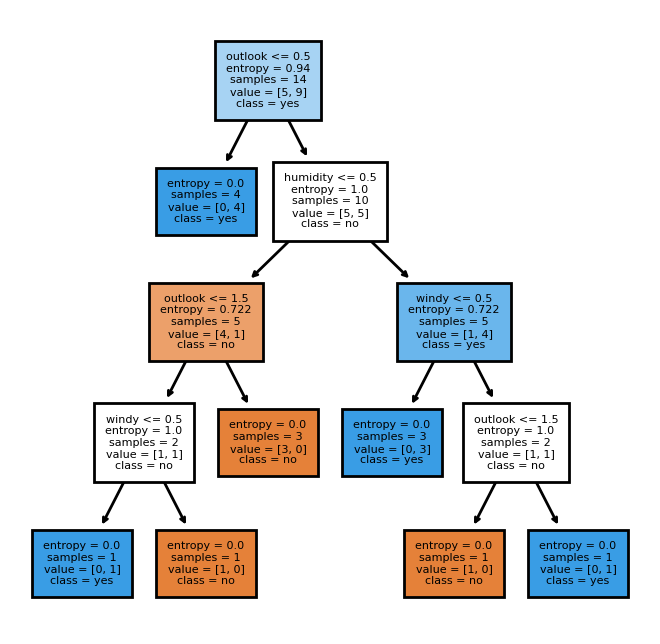

In [26]:
# Visualize the decision tree model
import matplotlib.pyplot as plt  # visualization library
from sklearn.tree import plot_tree
fig, axes = plt.subplots(1, 1, figsize=(4, 4), dpi=200)
plot_tree(dtree, fontsize=4, filled=True, 
               max_depth=4,
               feature_names= features.columns,
               class_names= list(target.unique()))
[...]

## Model the Pancretic Cancer dataset

### Load the data

In [3]:
# get data
df = pd.read_csv('https://raw.githubusercontent.com/IndraniMandal/ds-assets/main/assets/Pancreatic%20Cancer%202020.csv')

###Preprocessing

In [4]:
df= df.drop(['sample_origin','patient_cohort','sample_id', 'stage', 'benign_sample_diagnosis'], axis = 1)


In [31]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()

df['sex'] = Le.fit_transform(df['sex'])

In [32]:
for c in df.columns:
    df[c].fillna(0,inplace = True)

df.isnull().sum()

age              0
sex              0
diagnosis        0
plasma_CA19_9    0
creatinine       0
LYVE1            0
REG1B            0
TFF1             0
REG1A            0
dtype: int64

## Split the data into features and target

In [33]:
features= df.drop('diagnosis', axis=1) # drop the target column

In [34]:
features

,age,sex,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
0,33,0,11.7,1.83222,0.893219,52.948840,654.282174,1262.000
1,81,0,0.0,0.97266,2.037585,94.467030,209.488250,228.407
2,51,1,7.0,0.78039,0.145589,102.366000,461.141000,0.000
3,61,1,8.0,0.70122,0.002805,60.579000,142.950000,0.000
4,62,1,9.0,0.21489,0.000860,65.540000,41.088000,0.000
...,...,...,...,...,...,...,...,...
585,68,1,0.0,0.52026,7.058209,156.241000,525.178000,0.000
586,71,0,0.0,0.85956,8.341207,16.915000,245.947000,0.000
587,63,1,0.0,1.36851,7.674707,289.701000,537.286000,0.000
588,75,0,0.0,1.33458,8.206777,205.930000,722.523000,0.000


In [35]:
target = df.diagnosis
target

0      1
1      1
2      1
3      1
4      1
      ..
585    3
586    3
587    3
588    3
589    3
Name: diagnosis, Length: 590, dtype: int64

##Model building basics
Build models involving the 5 key steps:
1.   Import the model
2.   Specify which model we are building and vary the parameters
3.   Fit the model with the training features and target
4.   Predict the labels from the trained model
5.   Calculate the accuracy score by comparing the true labels to the predicted labels.

## Split the data into training and test datasets

In order to see how good our model is we split our data into a training and a testing set. This will allow us to properly validate the accuracy of our model. The Train set is used for training the model whereas the Test set is used for evauating the model.

<img src="https://drive.google.com/uc?id=18kExFCTVsfdHXBr8lEFkkkzoDeJ-hjlk" width =300>

In [38]:
#From the model selection library import the function for splitting the dataset into train and test sets
from sklearn.model_selection import train_test_split 

# Split the dataset (80% for train set and 20% in test set)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, shuffle=True, random_state=1)

*   `X_train` - Training features used to fit(train) the model
*   `y_train` - Training target labels used to fit(train) the model
*   `X_test`  - Testing features used to test the model
*   `y_test`  - True target labels used to compare againest the model predicted labels

##Training the model

In [39]:
#From the model selection library import decision tree
from sklearn import tree

#models is a decision tree with entropy as a parameter
dtree = tree.DecisionTreeClassifier(criterion='entropy', max_depth = 4)
#Train the model with training feature matrix and it's corresponding target labels
dtree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

[Ellipsis]

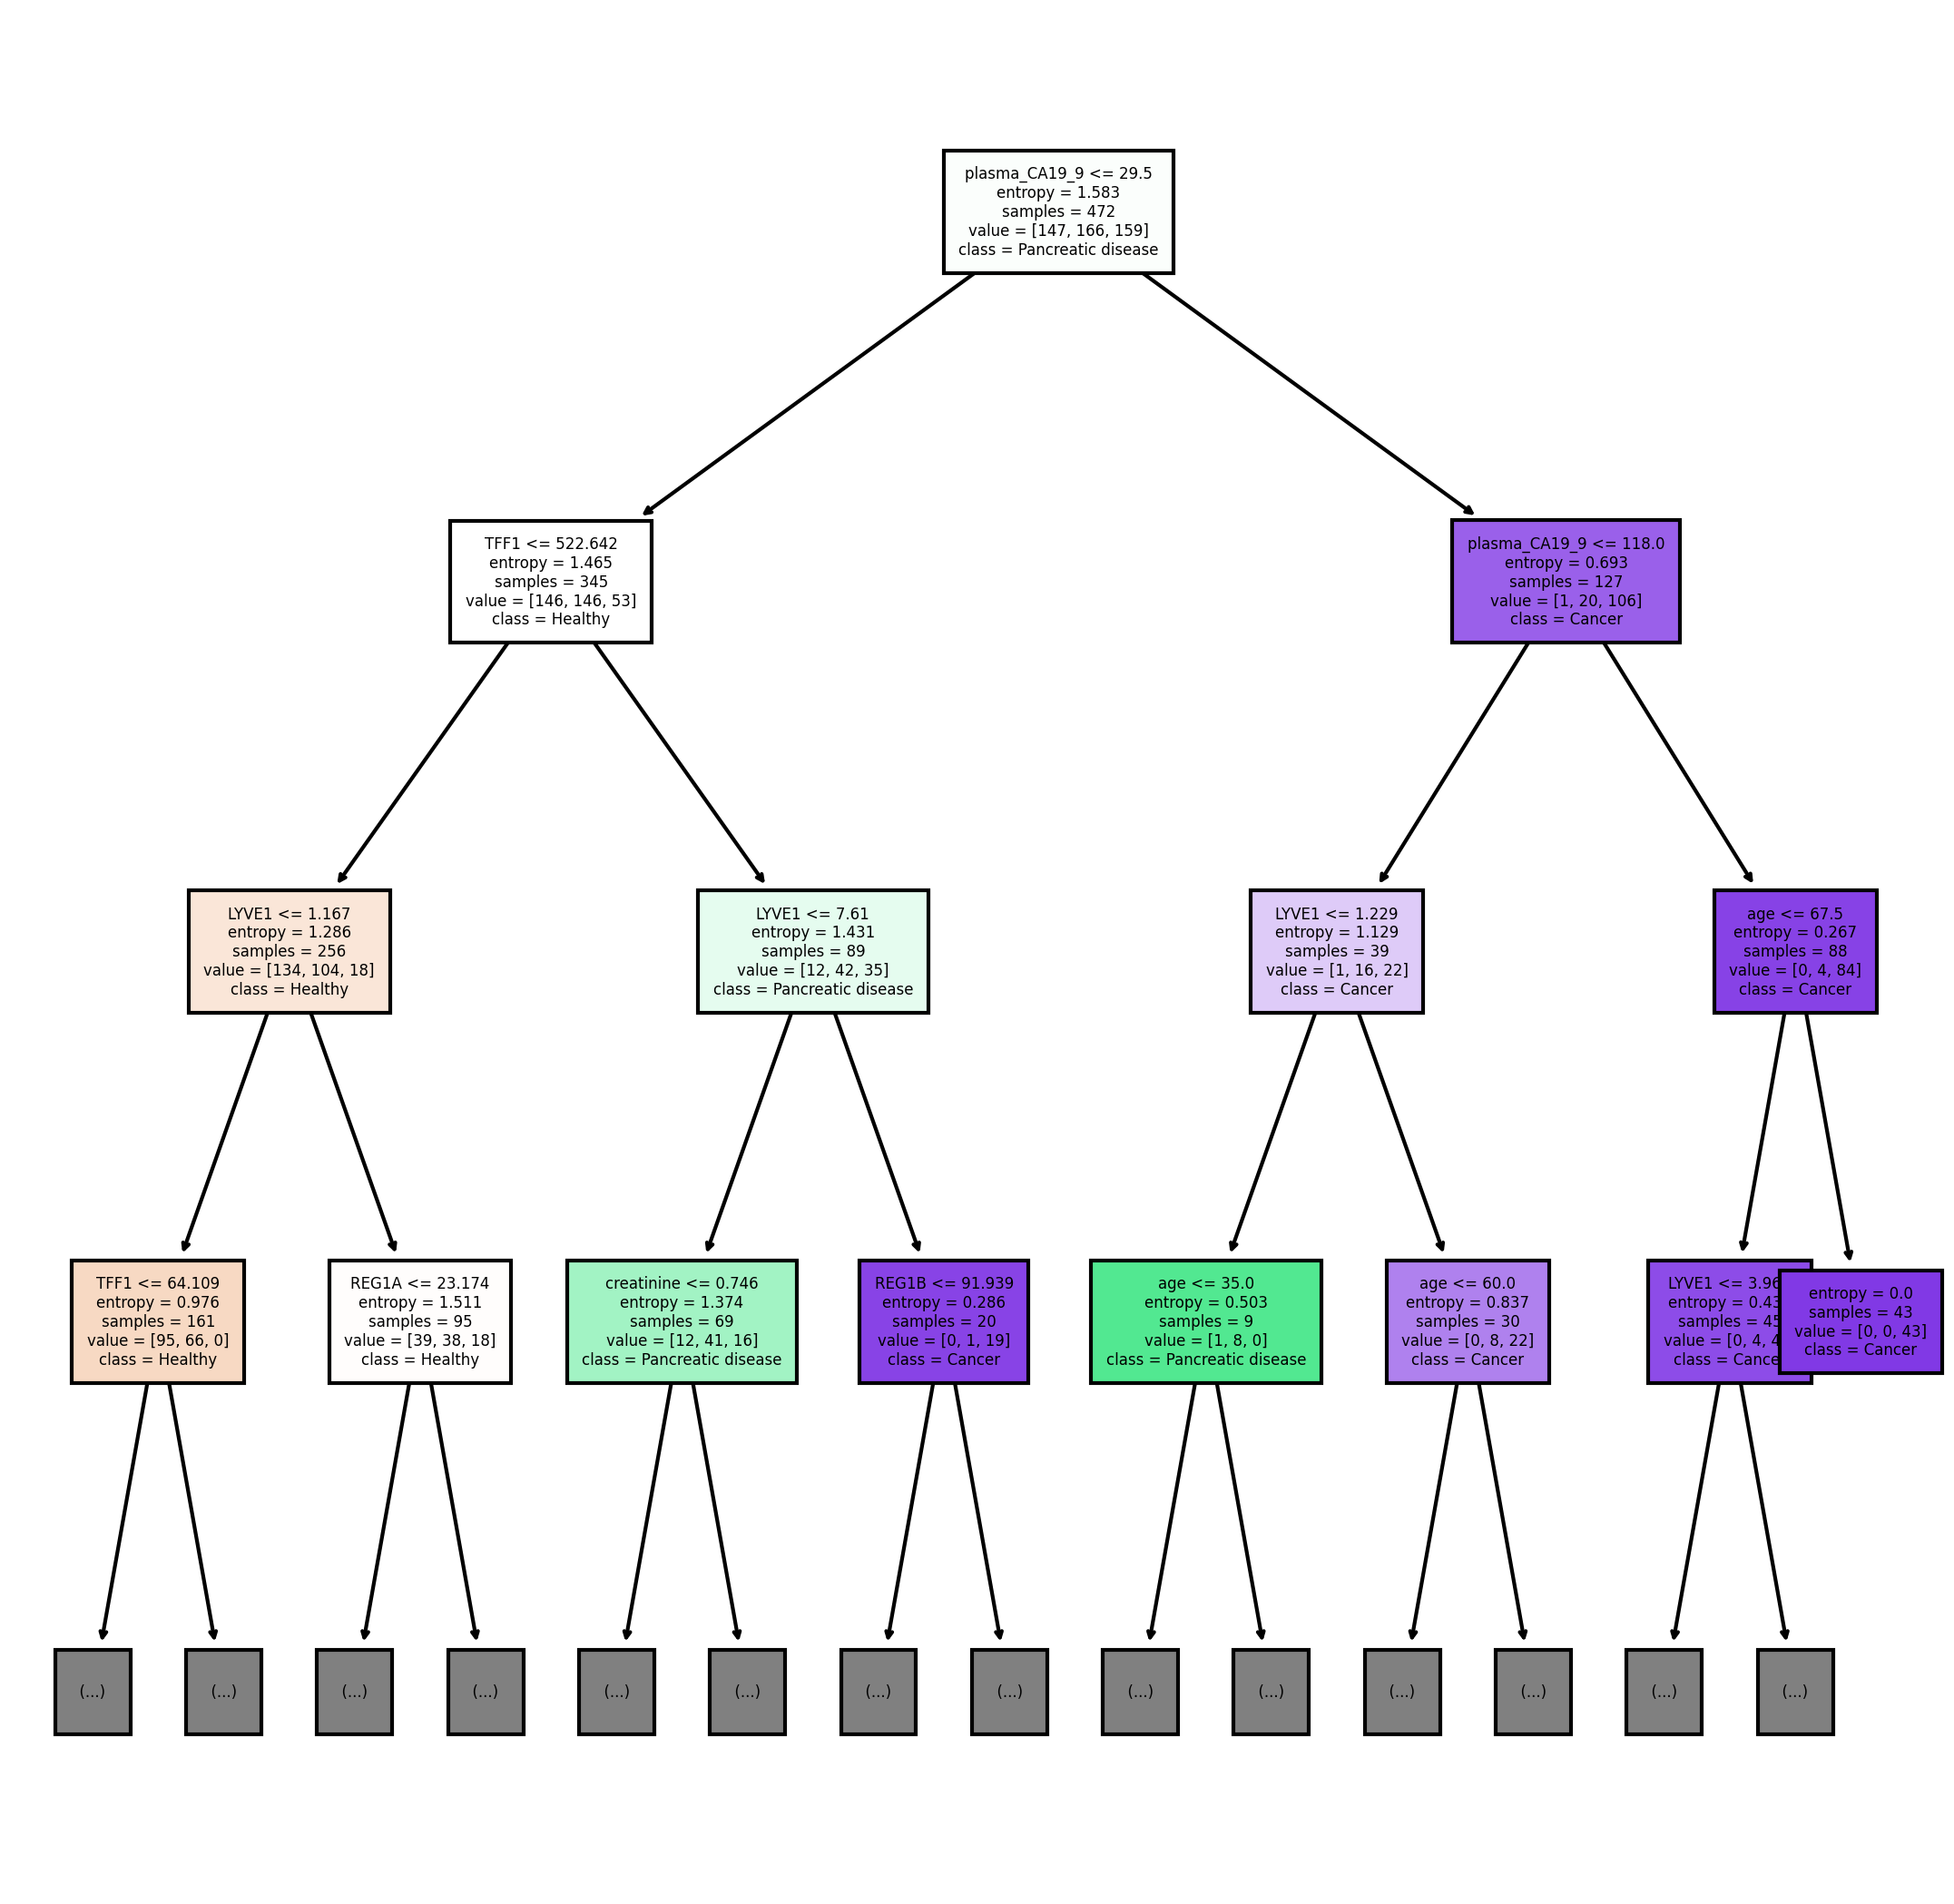

In [45]:
# Visualize the decision tree model
import matplotlib.pyplot as plt  # visualization library
from sklearn.tree import plot_tree
fig, axes = plt.subplots(1, 1, figsize=(9, 9), dpi=300)
plot_tree(dtree, fontsize=4, filled=True,
               max_depth=3,
               feature_names= features.columns,
               class_names= ['Healthy','Pancreatic disease','Cancer'])
[...]

## Testing and Prediction
We test the model to see how well it performs on data it hasn't seen before. We use the Test set to test our model. The predictions generated by the model is then matched against the true test labels(`y_test`).

In [18]:
# Prediction using Testing data
pred_test = dtree.predict(X_test)
pred_test[:5]

array([3, 3, 2, 3, 1])

In [20]:
y_test.head()

509    3
257    2
23     1
458    3
90     1
Name: diagnosis, dtype: int64

##Model accuracy
Finally, she we calculate the accuracy of the model that measures the percentage of correct answers. 
The percentage of correct predictions is given by the `accuracy_score`.

`Accuracy score = Number of correct predictions/ Total number of predictions`

In [30]:
from sklearn.metrics import accuracy_score

#calculate the model metrics by comparing the true testing target and the predicted values
test_acc = accuracy_score(y_test, pred_test)
print("Test accuracy is: {}".format(test_acc))

Test accuracy is: 0.7203389830508474
